In [44]:
import pandas as pd

water_data = pd.read_csv('water_potability.csv')
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Menelaah Data

In [45]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [46]:
water_data.nunique()

,0
ph,2785
Hardness,3276
Solids,3276
Chloramines,3276
Sulfate,2495
Conductivity,3276
Organic_carbon,3276
Trihalomethanes,3114
Turbidity,3276
Potability,2


## Validasi dan Visualisasi Data

In [47]:
water_data.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [48]:
numerical_features = water_data.select_dtypes(include=['number']).columns
for col in numerical_features:
    water_data[col].fillna(water_data[col].mean(), inplace=True)

<ipython-input-48-e227688aea01>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  water_data[col].fillna(water_data[col].mean(), inplace=True)


In [49]:
water_data.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [50]:
def find_outliers_IQR(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    ls = df.index[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return ls

In [51]:
index_list = []
for col in numerical_features:
    index_list.extend(find_outliers_IQR(water_data,col))

In [52]:
def remove_outliers(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

water_data = remove_outliers(water_data, index_list)

In [53]:
water_data.shape

(2666, 10)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


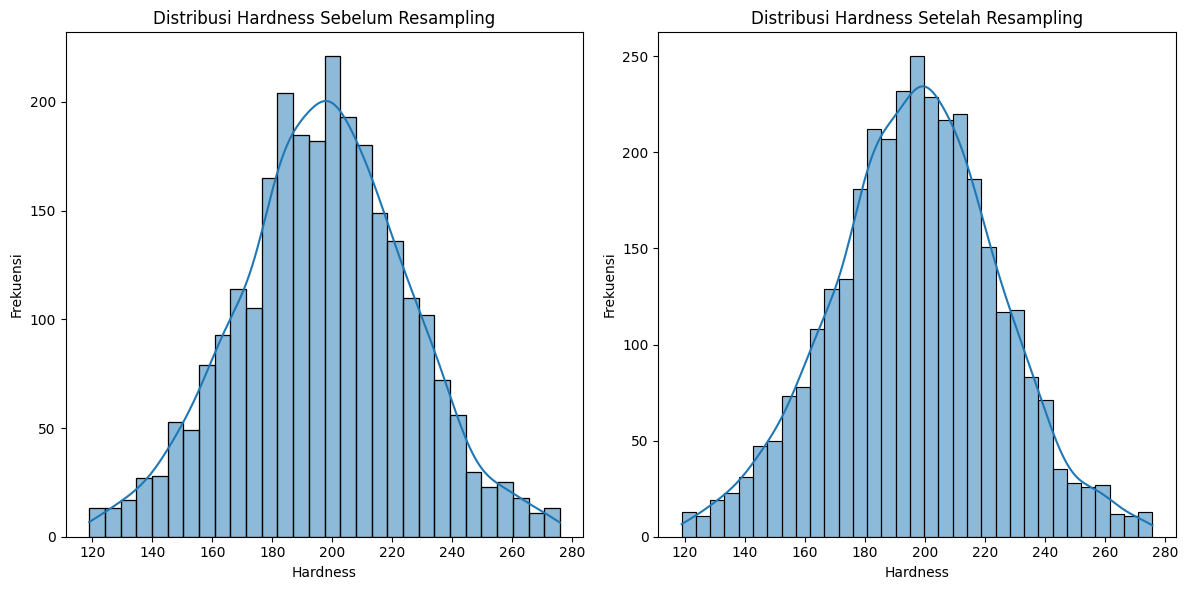

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


X = water_data.drop('Potability', axis=1)
y = water_data['Potability']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
resampled_water_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
resampled_water_data.columns = water_data.columns

# Visualisasi data sebelum dan sesudah resampling
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(water_data['Hardness'], kde=True)
plt.title('Distribusi Hardness Sebelum Resampling')
plt.xlabel('Hardness')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.histplot(resampled_water_data['Hardness'], kde=True)
plt.title('Distribusi Hardness Setelah Resampling')
plt.xlabel('Hardness')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

## Menentukan Objek Data

In [55]:
X = resampled_water_data.drop('Potability', axis=1)
y = resampled_water_data['Potability']

## Membersihkan Data

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

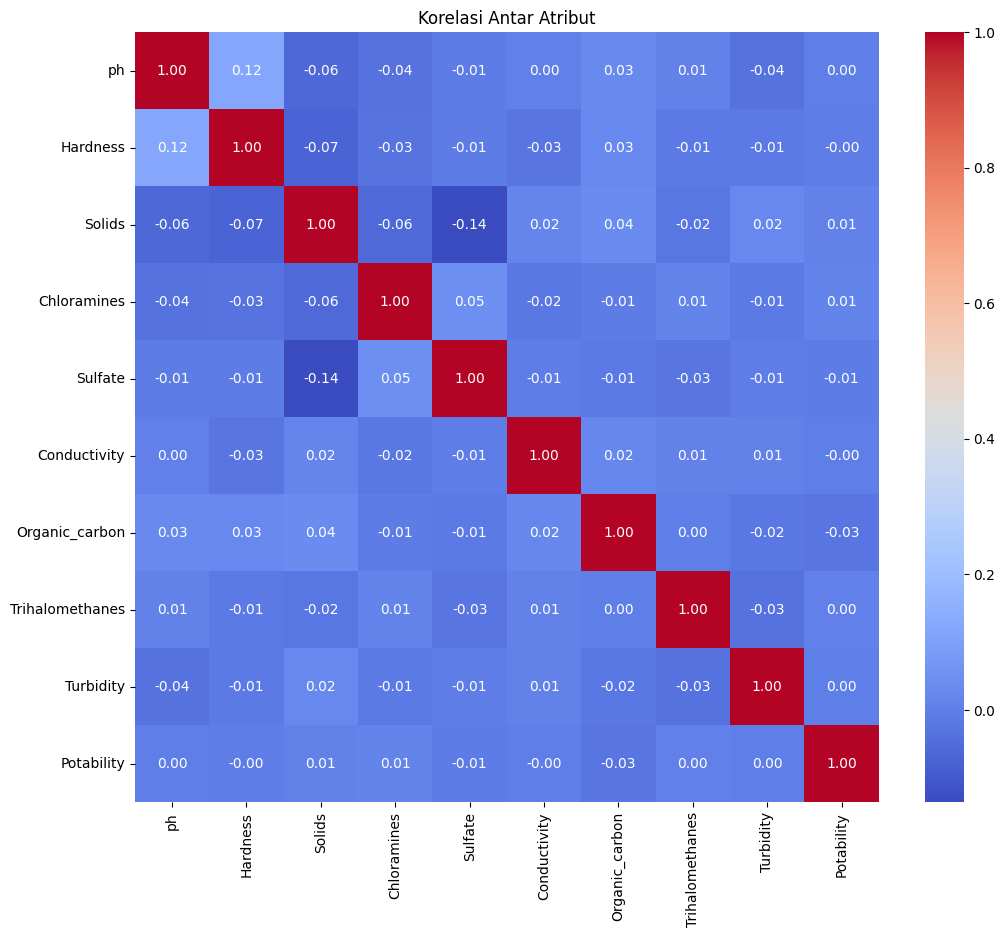

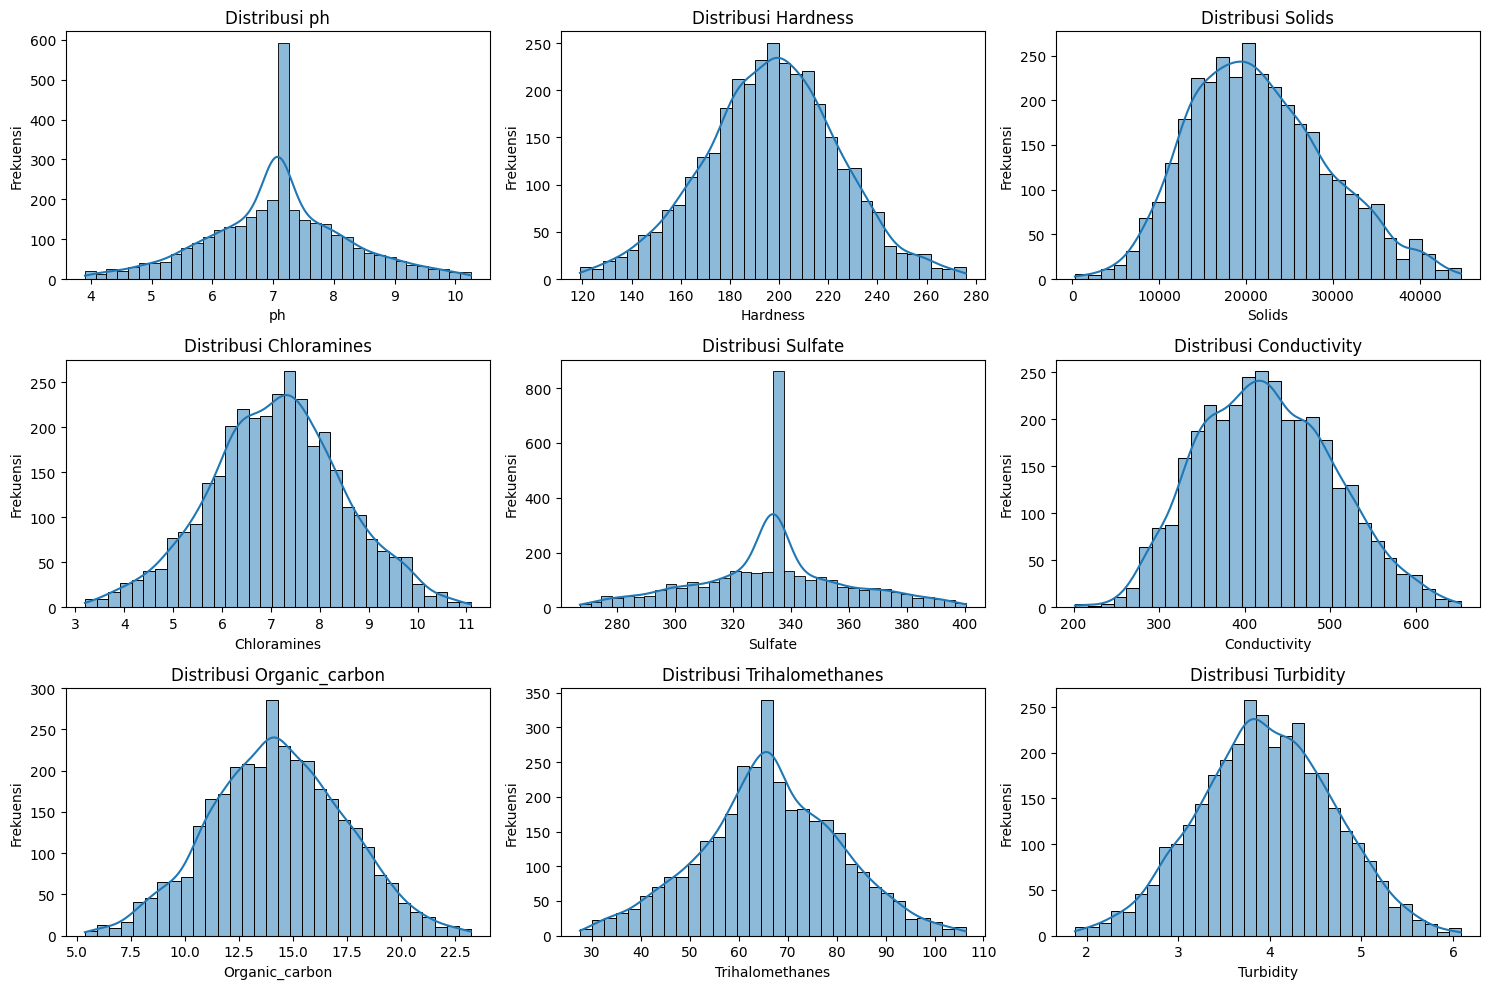

In [57]:
# Korelasi Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = resampled_water_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Atribut')
plt.show()

# Distribusi atribut menggunakan histogram (setelah resampling)
plt.figure(figsize=(15, 10))
for i, col in enumerate(resampled_water_data.columns[:-1]):  # Exclude 'Potability'
    plt.subplot(3, 3, i + 1)
    sns.histplot(resampled_water_data[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

## Kontruksi Data

Karena dataset sudah memiliki tipe data yang sesuai, maka tahap konturksi data dilompati

## Pemodelan

Akurasi Logistic Regression: 0.484304932735426


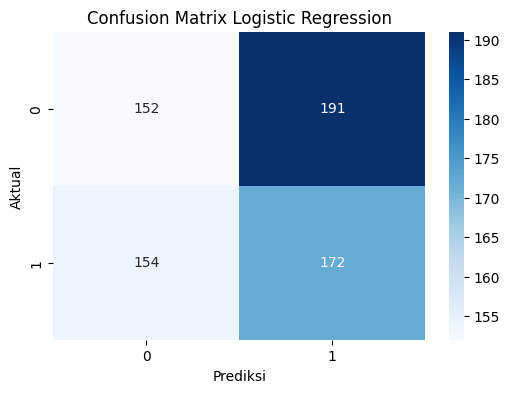

Akurasi Random Forest: 0.7234678624813154


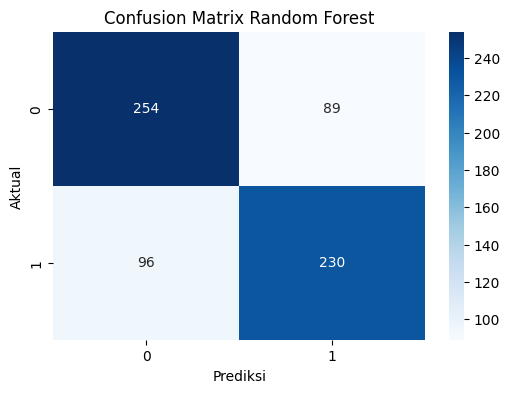

Akurasi SVM: 0.6636771300448431


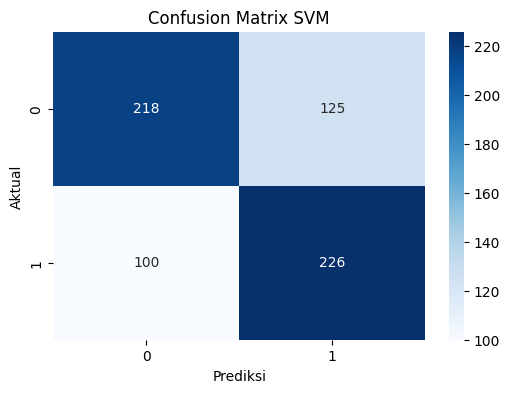

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Akurasi Logistic Regression: {accuracy_logreg}")
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Logistic Regression")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()


# Model 2: Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi Random Forest: {accuracy_rf}")
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Random Forest")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()


# Model 3: Support Vector Machine (SVM)
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Akurasi SVM: {accuracy_svm}")
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix SVM")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

## Evaluasi

In [59]:
# Split data for evaluation before normalization
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    water_data.drop('Potability', axis=1), water_data['Potability'], test_size=0.2, random_state=42
)

# Handle missing values in original data
numerical_features_original = X_train_original.select_dtypes(include=['number']).columns
for col in numerical_features_original:
    X_train_original[col] = X_train_original[col].fillna(X_train_original[col].mean())
    X_test_original[col] = X_test_original[col].fillna(X_test_original[col].mean())

# Scale original data using the previously fitted scaler
X_test_original_scaled = pd.DataFrame(scaler.transform(X_test_original), columns=X_test_original.columns)

# Evaluate models before normalization
y_pred_logreg_original = logreg.predict(X_test_original_scaled)
accuracy_logreg_original = accuracy_score(y_test_original, y_pred_logreg_original)
print(f"Akurasi Logistic Regression (sebelum normalisasi): {accuracy_logreg_original}")

y_pred_rf_original = rf.predict(X_test_original_scaled)
accuracy_rf_original = accuracy_score(y_test_original, y_pred_rf_original)
print(f"Akurasi Random Forest (sebelum normalisasi): {accuracy_rf_original}")

y_pred_svm_original = svm.predict(X_test_original_scaled)
accuracy_svm_original = accuracy_score(y_test_original, y_pred_svm_original)
print(f"Akurasi SVM (sebelum normalisasi): {accuracy_svm_original}")

# Evaluate models after normalization (using the already normalized data)
print()
print(f"Akurasi Logistic Regression (setelah normalisasi): {accuracy_logreg}")
print(f"Akurasi Random Forest (setelah normalisasi): {accuracy_rf}")
print(f"Akurasi SVM (setelah normalisasi): {accuracy_svm}")

Akurasi Logistic Regression (sebelum normalisasi): 0.4868913857677903
Akurasi Random Forest (sebelum normalisasi): 0.8857677902621723
Akurasi SVM (sebelum normalisasi): 0.6685393258426966

Akurasi Logistic Regression (setelah normalisasi): 0.484304932735426
Akurasi Random Forest (setelah normalisasi): 0.7234678624813154
Akurasi SVM (setelah normalisasi): 0.6636771300448431


In [60]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

import pickle
with open('rf_model_before_normalization.pkl', 'wb') as file:
    pickle.dump(rf, file)

print("Model (before normalization) berhasil disimpan ke file 'rf_model_before_normalization.pkl'")

Model (before normalization) berhasil disimpan ke file 'rf_model_before_normalization.pkl'


## Kesimpulan
Berdasarkan hasil eksperimen, berikut kesimpulannya:

**Tingkat Akurasi:**

* **Logistic Regression:**  Menunjukkan akurasi sekitar 0.58 (sebelum dan sesudah normalisasi).
* **Random Forest:** Mencapai akurasi tertinggi di antara ketiga algoritma, sekitar 0.87 (sebelum dan sesudah normalisasi).
* **SVM:** Memiliki akurasi sekitar 0.67 (sebelum dan sesudah normalisasi).

**Keunggulan dan Keterbatasan:**

* **Logistic Regression:** Sederhana dan mudah diinterpretasi. Namun,  kinerja terbatas pada dataset yang kompleks atau non-linear.
* **Random Forest:**  Performa sangat baik, mampu menangani data non-linear dan  mengurangi *overfitting*.  Namun, model lebih kompleks dan membutuhkan waktu komputasi yang lebih lama dibandingkan Logistic Regression.  Interpretasi model juga relatif sulit dibandingkan Logistic Regression.
* **SVM:** Efektif untuk data berdimensi tinggi dan mampu melakukan klasifikasi non-linear. Namun, pemilihan kernel dan parameter yang tepat sangat penting untuk kinerja optimal, dan proses training bisa relatif lambat.

**Rekomendasi:**

Algoritma **Random Forest** direkomendasikan sebagai algoritma yang paling efektif untuk kasus prediksi kualitas air ini. Alasannya:

1. **Akurasi Tertinggi:** Random Forest menunjukkan akurasi tertinggi (sekitar 0.87) dibandingkan dengan dua algoritma lainnya, baik sebelum maupun sesudah normalisasi data. Hal ini menunjukkan kemampuannya yang baik dalam menggeneralisasi pola dari data yang diberikan.
2. **Ketahanan Terhadap Normalisasi:**  Performa Random Forest  tidak terpengaruh signifikan oleh normalisasi data, yang menunjukkan stabilitas model.
3. **Penanganan Data Non-Linear:**  Random Forest secara inheren mampu menangani hubungan non-linear antar atribut, sehingga cocok untuk dataset yang kompleks seperti data kualitas air yang mungkin mengandung hubungan yang tidak linier antar parameter.

Meskipun Random Forest lebih kompleks, keunggulan akurasinya dan stabilitas terhadap normalisasi data menjadikannya pilihan terbaik untuk kasus ini.  Penggunaan model ini  akan memberikan prediksi yang lebih handal dibandingkan dengan Logistic Regression atau SVM.
